In [2]:
import glob,sys,os,re
import pickle
import numpy as np
import pandas as pd
from mylab.Functions import *
# from core.context_exposure import *
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from core.Cdatabase import *
db = DataBase()

In [7]:
context_map = db.context_map

In [272]:
context_map[(context_map["part"]==234) & (context_map["aim"]=="BC")]

,Unnamed: 0,mouse_id,part,aim,index,ctx_0,ctx_1,ctx_2,rule_0,rule_1,rule_2
71,218,206552,234,BC,20200801-133557,A,B,C,left,left,left
73,258,206553,234,BC,20200801-141016,A,B,C,left,left,left
75,125,206548,234,BC,20200801-144604,A,B,C,left,left,left
77,183,206551,234,BC,20200801-151117,A,B,C,left,left,left
80,155,206550,234,BC,20200801-162606,A,B,C,left,left,left
81,9,201033,234,BC,20200801-165022,A,B,C,left,left,left
84,71,2020061,234,BC,20200801-195559,A,B,C,left,left,left
87,102,206534,234,BC,20200801-205411,A,B,C,left,left,left
90,56,201034,234,BC,20200803-144238,A,B,C,left,left,left


## index celltypes only at part234

In [39]:
# organize files according to  task
celltype_files = {
"celltype_files_lg" :[[i for i in filelists if "aim_lg" in i] for filelists in Celltypes.values()]
,"celltype_files_AB" :[[i for i in filelists if "aim_AB" in i] for filelists in Celltypes.values()]
,"celltype_files_A1B1" :[[i for i in filelists if "aim_A1B1" in i] for filelists in Celltypes.values()]
,"celltype_files_BC" :[[i for i in filelists if "aim_BC" in i] for filelists in Celltypes.values()]
,"celltype_files_B1C1" :[[i for i in filelists if "aim_B1C1" in i] for filelists in Celltypes.values()]
,"celltype_files_AC" :[[i for i in filelists if "aim_AC" in i] for filelists in Celltypes.values()]
,"celltype_files_A1C1" :[[i for i in filelists if "aim_A1C1" in i] for filelists in Celltypes.values()]
,"celltype_files_ces" :[[i for i in filelists if "aim_ce" in i] for filelists in Celltypes.values()]
,"celltype_files_ce_before_lg" : [i[:-3] for i in celltype_files_ces]
}
celltype_files_contexts={
"celltype_files_lg" :[[]]
,"celltype_files_AB" :[[i for i in filelists if "aim_AB" in i] for filelists in Celltypes.values()]
,"celltype_files_A1B1" :[[i for i in filelists if "aim_A1B1" in i] for filelists in Celltypes.values()]
,"celltype_files_BC" :[[i for i in filelists if "aim_BC" in i] for filelists in Celltypes.values()]
,"celltype_files_B1C1" :[[i for i in filelists if "aim_B1C1" in i] for filelists in Celltypes.values()]
,"celltype_files_AC" :[[i for i in filelists if "aim_AC" in i] for filelists in Celltypes.values()]
,"celltype_files_A1C1" :[[i for i in filelists if "aim_A1C1" in i] for filelists in Celltypes.values()]
,"celltype_files_ces" :[[i for i in filelists if "aim_ce" in i] for filelists in Celltypes.values()]
,"celltype_files_ce_before_lg" : [i[:-3] for i in celltype_files_ces]    
}

In [57]:
celltypes = db.index_celltypes(part=234)
# celltypes = glob.glob(r"C:\Users\qiushou\Desktop\part1\*.pkl")
celltypes = [i for i in celltypes if "20103" not in i and not "celltype_206552_part234_day20200730_aim_ce" in i ]
# celltypes
[print(i) for i in celltypes if "206552" in i]

\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200731_aim_ce.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200731_aim_lg.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200801_aim_B1C1.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200801_aim_BC.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200804_aim_A1C1.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200804_aim_AC.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200805_aim_A1B1.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200805_aim_AB.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200806_aim_ce.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206552_part234_day20200807_aim_c

[None, None, None, None, None, None, None, None, None, None, None]

In [253]:
# orgnize celltyps
mouseids = ["2020061","206534","206548","206550","206551","206552","206553"]

Celltypes = {}
for mouseid in mouseids:
    filelists = [i for i in celltypes if mouseid in i]
    Celltypes[mouseid] = {
        "celltype_files_lg" :[i for i in filelists if "aim_lg" in i]
        ,"celltype_files_AB" :[i for i in filelists if "aim_AB" in i] 
        ,"celltype_files_A1B1" :[i for i in filelists if "aim_A1B1" in i]
        ,"celltype_files_BC" :[i for i in filelists if "aim_BC" in i]
        ,"celltype_files_B1C1" :[i for i in filelists if "aim_B1C1" in i] 
        ,"celltype_files_AC" :[i for i in filelists if "aim_AC" in i] 
        ,"celltype_files_A1C1" :[i for i in filelists if "aim_A1C1" in i] 
        ,"celltype_files_ces" :[i for i in filelists if "aim_ce" in i] 
        ,"celltype_files_ce_before_lg" : [i for i in filelists if "aim_ce" in i][:-3]      
    }

In [264]:
def average_percentage(celltype_files,contexts=[0,1]):
    wenn_lists=[]
    for celltype_file in celltype_files:
        ct=CellType(celltype_file)
        contextcell_id, rdcell_id,pccell_id,total_cell_num = ct.specific_ids(contexts=contexts)

        contextcell_ids= list(set(contextcell_id["ctx%scells"%contexts[0]]+contextcell_id["ctx%scells"%contexts[1]]))
        rdcell_ids = list(set(rdcell_id["context%s_leftcells"%contexts[0]]+ rdcell_id["context%s_rightcells"%contexts[0]]+ rdcell_id["context%s_leftcells"%contexts[1]]+ rdcell_id["context%s_rightcells"%contexts[1]]))
        pccell_ids = list(set(pccell_id["context%s_pccells"%contexts[0]] + pccell_id["context%s_pccells"%contexts[1]]))
    #         print(rdcell_ids)

        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        pc_cellids = list(set(spread(pccell_id.values())))

        only_ctx_cellids = [i for i in ctx_cellids if not i in rd_cellids and not i in pc_cellids]
        only_rd_cellids = [i for i in rd_cellids if not i in ctx_cellids and not i in pc_cellids]
        only_pc_cellids = [i for i in pc_cellids if not i in rd_cellids and not i in ctx_cellids ]
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]                
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]

        wenn_list = [            
            len(ctx_cellids)/total_cell_num
            ,len(rd_cellids)/total_cell_num
            ,len(pc_cellids)/total_cell_num
            ,len(ctx_rd_cellids)/total_cell_num
            ,len(ctx_pc_cellids)/total_cell_num
            ,len(rd_pc_cellids)/total_cell_num
            ,len(ctx_rd_pc_cellids)/total_cell_num
            ,len(only_ctx_cellids)/total_cell_num
            ,len(only_rd_cellids)/total_cell_num
            ,len(only_pc_cellids)/total_cell_num]
        wenn_lists.append(wenn_list)
#         np.mean(wenn_lists,axis=0)
        
    return wenn_lists

## cell percentage of different session types

In [107]:
session_types=['celltype_files_lg', 'celltype_files_AB', 'celltype_files_A1B1', 'celltype_files_BC', 'celltype_files_B1C1', 'celltype_files_AC', 'celltype_files_A1C1', 'celltype_files_ces', 'celltype_files_ce_before_lg']
contexts_types=[[1,2],[0,1],[0,1],[1,2],[1,2],[1,2],[1,2],[0,1],[0,1]]
mean_percentages={}
for session_type,contexts in zip(session_types,contexts_types):
    files = []
    for mouseid in mouseids:
        files.append(Celltypes[mouseid][session_type])
    mean_percentages[session_type] = [average_percentage(i,contexts=contexts) for i in files]

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells:

## plot

### celltype_files_lg & celltype_files_ce_before_lg

In [134]:
mean_percentage_lg = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_lg"]])
mean_percentage_ce_before_lg = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_ce_before_lg"]])

mean_mean_percentage_lg = pd.DataFrame(mean_percentage_lg).mean(axis=0)
mean_mean_percentage_ce_before_lg = pd.DataFrame(mean_percentage_ce_before_lg).mean(axis=0)
sem_mean_percentage_lg =pd.DataFrame(mean_percentage_lg).sem(axis=0)
sem_mean_percentage_ce_before_lg = pd.DataFrame(mean_percentage_ce_before_lg).sem(axis=0)


venn_lists1 = [round(i,2) for i in np.mean(mean_percentage_lg,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists2 = [round(i,2) for i in np.mean(mean_percentage_ce_before_lg,axis=0)[[7,8,3,9,4,5,6]]]


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


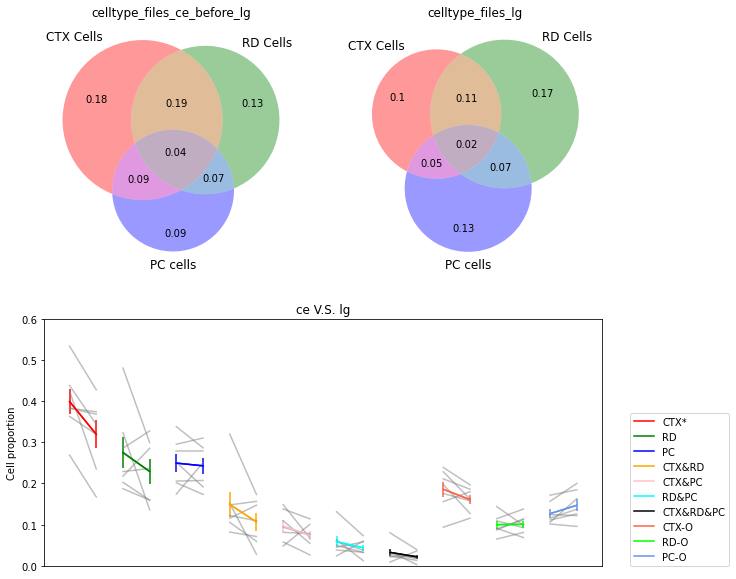

In [302]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(222)
venn3(venn_lists2,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("celltype_files_lg")
plt.subplot(221)

venn3(venn_lists1,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("celltype_files_ce_before_lg")

plt.subplot(212)
colors = ["red","green","blue","orange","pink","cyan","black","tomato","lime","cornflowerblue"]
handles=[]
for (m_a,m_b,s_a,s_b,c,i) in zip(mean_mean_percentage_ce_before_lg,mean_mean_percentage_lg,sem_mean_percentage_ce_before_lg,sem_mean_percentage_lg,colors,np.arange(1,11)):
    h = plt.plot(np.array([1,2])+i*2,(m_a,m_b),c=c)
    handles.append(h)
    plt.errorbar(np.array([1,2])+i*2,(m_a,m_b),yerr=(s_a,s_b),c=c)
plt.legend(handles,labels=["CTX*","RD","PC","CTX&RD","CTX&PC","RD&PC","CTX&RD&PC","CTX-O","RD-O","PC-O"],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
for i in np.arange(1,11):
    for p_a,p_b in zip(mean_percentage_ce_before_lg[:,i-1],mean_percentage_lg[:,i-1]):
        plt.plot(np.array([1,2])+i*2,(p_a,p_b),color="grey",alpha=0.5)

plt.ylim(0,0.6)

plt.title("ce V.S. lg")
plt.ylabel("Cell proportion")
plt.xticks([])
plt.show()

In [202]:
from mylab.ana.Mstat import *

for i in range(10):
    print("--------------------------")
    print(i,Wilcoxon_signed_ranktest(mean_percentage_lg[:,i]-mean_percentage_ce_before_lg[:,i])[1])

--------------------------
0 0.017960477526078766
--------------------------
1 0.39802471950693785
--------------------------
2 0.7531523647659145
--------------------------
3 0.12819017434510785
--------------------------
4 0.12819017434510785
--------------------------
5 0.23672357063785732
--------------------------
6 0.17629637444051116
--------------------------
7 0.12819017434510785
--------------------------
8 0.8657723749926214
--------------------------
9 0.06297905121445523


 ### celltype_files_'elements omission'

In [235]:
mean_percentage_AB = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_AB"]])
mean_percentage_A1B1 = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_A1B1"]])
mean_percentage_AC = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_AC"]])
mean_percentage_A1C1 = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_A1C1"]])
mean_percentage_BC = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_BC"]])
mean_percentage_B1C1 = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_B1C1"]])

In [210]:
mean_mean_percentage_AB = pd.DataFrame(mean_percentage_AB).mean(axis=0)
sem_mean_percentage_AB = pd.DataFrame(mean_percentage_AB).sem(axis=0)
mean_mean_percentage_A1B1 = pd.DataFrame(mean_percentage_A1B1).mean(axis=0)
sem_mean_percentage_A1B1 = pd.DataFrame(mean_percentage_A1B1).sem(axis=0)
mean_mean_percentage_AC = pd.DataFrame(mean_percentage_AC).mean(axis=0)
sem_mean_percentage_AC = pd.DataFrame(mean_percentage_AC).sem(axis=0)
mean_mean_percentage_A1C1 = pd.DataFrame(mean_percentage_A1C1).mean(axis=0)
sem_mean_percentage_A1C1 = pd.DataFrame(mean_percentage_A1C1).sem(axis=0)
mean_mean_percentage_BC = pd.DataFrame(mean_percentage_BC).mean(axis=0)
sem_mean_percentage_BC = pd.DataFrame(mean_percentage_BC).sem(axis=0)
mean_mean_percentage_B1C1 = pd.DataFrame(mean_percentage_B1C1).mean(axis=0)
sem_mean_percentage_B1C1 = pd.DataFrame(mean_percentage_B1C1).sem(axis=0)

In [211]:
venn_lists1 = [round(i,2) for i in np.mean(mean_percentage_AB,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists2 = [round(i,2) for i in np.mean(mean_percentage_A1B1,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists3 = [round(i,2) for i in np.mean(mean_percentage_AC,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists4 = [round(i,2) for i in np.mean(mean_percentage_A1C1,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists5 = [round(i,2) for i in np.mean(mean_percentage_BC,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists6 = [round(i,2) for i in np.mean(mean_percentage_B1C1,axis=0)[[7,8,3,9,4,5,6]]]


Text(0.5, 1.0, 'celltype_files_B1C1')

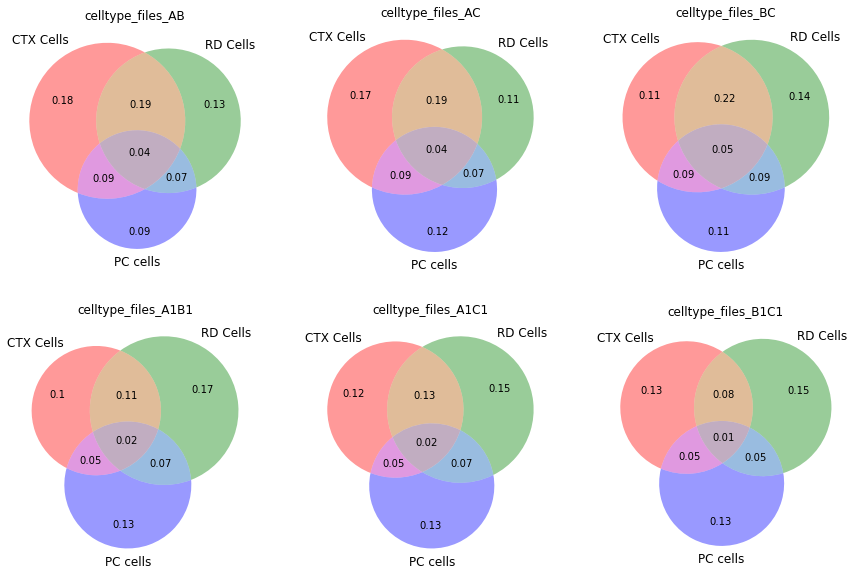

In [216]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.subplot(231)
venn3(venn_lists1,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("celltype_files_AB")

plt.subplot(232)
venn3(venn_lists3,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("celltype_files_AC")
plt.subplot(233)
venn3(venn_lists5,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("celltype_files_BC")
plt.subplot(234)
venn3(venn_lists2,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("celltype_files_A1B1")
plt.subplot(235)
venn3(venn_lists4,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("celltype_files_A1C1")
plt.subplot(236)
venn3(venn_lists6,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("celltype_files_B1C1")


#### AB vs A1B1

In [252]:
mean_percentage_AB

array([[0.53153153, 0.39339339, 0.23123123, 0.22522523, 0.12312312,
        0.09009009, 0.06006006, 0.24324324, 0.13813814, 0.07807808],
       [0.45405405, 0.4       , 0.25405405, 0.23243243, 0.12432432,
        0.0972973 , 0.06486486, 0.16216216, 0.13513514, 0.0972973 ],
       [0.35362319, 0.39710145, 0.22608696, 0.18550725, 0.07246377,
        0.07826087, 0.02318841, 0.11884058, 0.15652174, 0.09855072],
       [0.36411609, 0.26121372, 0.21108179, 0.11081794, 0.05277045,
        0.05540897, 0.01319261, 0.21372032, 0.10817942, 0.11609499],
       [0.278125  , 0.215625  , 0.103125  , 0.0875    , 0.015625  ,
        0.0125    , 0.        , 0.175     , 0.115625  , 0.075     ],
       [0.47014925, 0.31094527, 0.18159204, 0.16915423, 0.08955224,
        0.03731343, 0.02238806, 0.23383085, 0.12686567, 0.07711443],
       [0.56455922, 0.4888691 , 0.31522707, 0.33570793, 0.16651825,
        0.11308994, 0.07479964, 0.13713268, 0.11487088, 0.11041852]])

--------------------------
0 0.017960477526078766
--------------------------
1 0.6120898800892568
--------------------------
2 0.7353166906373405
--------------------------
3 0.017960477526078766
--------------------------
4 0.017960477526078766
--------------------------
5 1.0
--------------------------
6 0.043114446783075355
--------------------------
7 0.04252247799805163
--------------------------
8 0.027991815485665747
--------------------------
9 0.17629637444051116


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


([], <a list of 0 Text major ticklabel objects>)

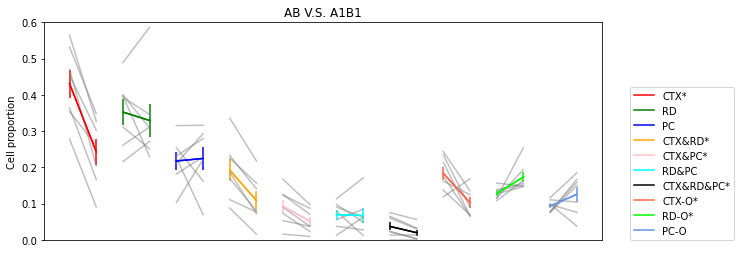

In [301]:
from mylab.ana.Mstat import *
plt.figure(figsize=(10,4))
for i in range(10):
    print("--------------------------")
    print(i,Wilcoxon_signed_ranktest(mean_percentage_AB[:,i]-mean_percentage_A1B1[:,i])[1])

colors = ["red","green","blue","orange","pink","cyan","black","tomato","lime","cornflowerblue"]
handles=[]
for (m_a,m_b,s_a,s_b,c,i) in zip(mean_mean_percentage_AB,mean_mean_percentage_A1B1,sem_mean_percentage_AB,sem_mean_percentage_A1B1,colors,np.arange(1,11)):
    h = plt.plot(np.array([1,2])+i*2,(m_a,m_b),c=c)
    handles.append(h)
    plt.errorbar(np.array([1,2])+i*2,(m_a,m_b),yerr=(s_a,s_b),c=c)
plt.legend(handles,labels=["CTX*","RD","PC","CTX&RD*","CTX&PC*","RD&PC","CTX&RD&PC*","CTX-O*","RD-O*","PC-O"],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
for i in np.arange(1,11):
    for p_a,p_b in zip(mean_percentage_AB[:,i-1],mean_percentage_A1B1[:,i-1]):
        plt.plot(np.array([1,2])+i*2,(p_a,p_b),color="grey",alpha=0.5)

plt.ylim(0,0.6)

plt.title("AB V.S. A1B1")
plt.ylabel("Cell proportion")
plt.xticks([])

#### AC vs A1C1

--------------------------
0 0.04252247799805163
--------------------------
1 0.8657723749926214
--------------------------
2 0.39802471950693785
--------------------------
3 0.17629637444051116
--------------------------
4 0.12819017434510785
--------------------------
5 0.49896229860376107
--------------------------
6 0.17295491798842066
--------------------------
7 0.06297905121445523
--------------------------
8 0.027991815485665747
--------------------------
9 0.3104944343172349


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


([], <a list of 0 Text major ticklabel objects>)

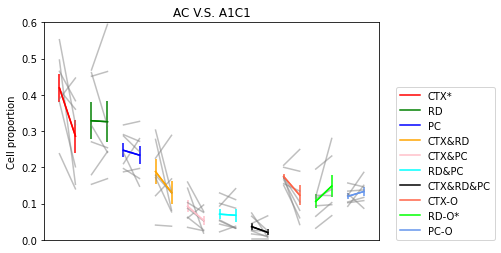

In [249]:
from mylab.ana.Mstat import *

for i in range(10):
    print("--------------------------")
    print(i,Wilcoxon_signed_ranktest(mean_percentage_AC[:,i]-mean_percentage_A1C1[:,i])[1])

colors = ["red","green","blue","orange","pink","cyan","black","tomato","lime","cornflowerblue"]
handles=[]
for (m_a,m_b,s_a,s_b,c,i) in zip(mean_mean_percentage_AC,mean_mean_percentage_A1C1,sem_mean_percentage_AC,sem_mean_percentage_A1C1,colors,np.arange(1,11)):
    h = plt.plot(np.array([1,2])+i*2,(m_a,m_b),c=c)
    handles.append(h)
    plt.errorbar(np.array([1,2])+i*2,(m_a,m_b),yerr=(s_a,s_b),c=c)
plt.legend(handles,labels=["CTX*","RD","PC","CTX&RD","CTX&PC","RD&PC","CTX&RD&PC","CTX-O","RD-O*","PC-O"],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
for i in np.arange(1,11):
    for p_a,p_b in zip(mean_percentage_AC[:,i-1],mean_percentage_A1C1[:,i-1]):
        plt.plot(np.array([1,2])+i*2,(p_a,p_b),color="grey",alpha=0.5)

plt.ylim(0,0.6)

plt.title("AC V.S. A1C1")
plt.ylabel("Cell proportion")
plt.xticks([])

#### BC vs B1C1

--------------------------
0 0.17629637444051116
--------------------------
1 0.09096894797535775
--------------------------
2 0.12819017434510785
--------------------------
3 0.04252247799805163
--------------------------
4 0.06297905121445523
--------------------------
5 0.06297905121445523
--------------------------
6 0.06297905121445523
--------------------------
7 0.7531523647659145
--------------------------
8 0.7353166906373405
--------------------------
9 0.24886387493792206


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


([], <a list of 0 Text major ticklabel objects>)

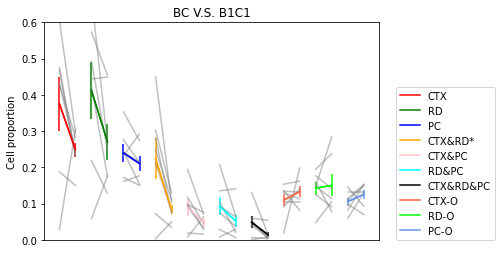

In [248]:
from mylab.ana.Mstat import *

for i in range(10):
    print("--------------------------")
    print(i,Wilcoxon_signed_ranktest(mean_percentage_BC[:,i]-mean_percentage_B1C1[:,i])[1])

colors = ["red","green","blue","orange","pink","cyan","black","tomato","lime","cornflowerblue"]
handles=[]
for (m_a,m_b,s_a,s_b,c,i) in zip(mean_mean_percentage_BC,mean_mean_percentage_B1C1,sem_mean_percentage_BC,sem_mean_percentage_B1C1,colors,np.arange(1,11)):
    h = plt.plot(np.array([1,2])+i*2,(m_a,m_b),c=c)
    handles.append(h)
    plt.errorbar(np.array([1,2])+i*2,(m_a,m_b),yerr=(s_a,s_b),c=c)
plt.legend(handles,labels=["CTX","RD","PC","CTX&RD*","CTX&PC","RD&PC","CTX&RD&PC","CTX-O","RD-O","PC-O"],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
for i in np.arange(1,11):
    for p_a,p_b in zip(mean_percentage_BC[:,i-1],mean_percentage_B1C1[:,i-1]):
        plt.plot(np.array([1,2])+i*2,(p_a,p_b),color="grey",alpha=0.5)

plt.ylim(0,0.6)

plt.title("BC V.S. B1C1")
plt.ylabel("Cell proportion")
plt.xticks([])

 ### single cell example

$W_a$:  **A**B **A1**B1 **A1**C1

$F_a$:  **A**B A1**B1** A1**C1**

$W_b$:  A**B** A1**B1** **B1**C1

$F_b$:  A**B** **A1**B1 B1**C1**

$Ctx A$: **A**B A1B1 **A**C A1C1

$Ctx B$: A**B** A1B1 **B**C B1C1

In [255]:
Celltypes.keys()

dict_keys(['2020061', '206534', '206548', '206550', '206551', '206552', '206553'])

In [277]:
Celltypes["2020061"]["celltype_files_A1C1"][0]

'\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_2020061_part234_day20200803_aim_A1C1.pkl'

In [299]:
# celltype_files_AB A1B1
# A/A1: ct.result["contextcells"]["ctx0_1"]["context0_cells"]
# B/B1: ct.result["contextcells"]["ctx0_1"]["context1_cells"]
# celltype_files_AC A1C1
# A/A1: ct.result["contextcells"]["ctx1_2"]["context1_cells"]
# C/C1: ct.result["contextcells"]["ctx1_2"]["context2_cells"]
# celltype_files_BC B1C1
# B/B1: ct.result["contextcells"]["ctx1_2"]["context1_cells"]
# C/C1: ct.result["contextcells"]["ctx1_2"]["context2_cells"]

def New_celltypes(Celltypes):
    Wa_cells_ = []
    Fa_cells_ = []
    Wb_cells_ = []
    Fb_cells_ = []
    CtxA_cells_ = []
    CtxB_cells_ = []
    for mouseid in mouseids:
        ct1=CellType(Celltypes[mouseid]["celltype_files_AB"][0])
        ct2=CellType(Celltypes[mouseid]["celltype_files_A1B1"][0])
        ct3=CellType(Celltypes[mouseid]["celltype_files_AC"][0])
        ct4=CellType(Celltypes[mouseid]["celltype_files_A1C1"][0])
        ct5=CellType(Celltypes[mouseid]["celltype_files_BC"][0])
        ct6=CellType(Celltypes[mouseid]["celltype_files_B1C1"][0])

        # Wa
        Wa_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context0_cells"] 
            if i in ct2.result["contextcells"]["ctx0_1"]["context0_cells"] and
               i in ct3.result["contextcells"]["ctx1_2"]["context1_cells"] and
               i in ct4.result["contextcells"]["ctx1_2"]["context1_cells"] ]
        Wa_cells = [mouseid+"_"+str(i) for i in Wa_cells]
        Wa_cells_ = Wa_cells_ + Wa_cells

        # Fa
        Fa_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context0_cells"] 
            if i in ct2.result["contextcells"]["ctx0_1"]["context1_cells"] and
               i in ct3.result["contextcells"]["ctx1_2"]["context1_cells"] and
               i in ct4.result["contextcells"]["ctx1_2"]["context2_cells"] ]
        Fa_cells = [mouseid+"_"+str(i) for i in Fa_cells]
        Fa_cells_ = Fa_cells_ + Fa_cells

        # Wb
        Wb_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context1_cells"] 
            if i in ct2.result["contextcells"]["ctx0_1"]["context1_cells"] and
               i in ct5.result["contextcells"]["ctx1_2"]["context1_cells"] and
               i in ct6.result["contextcells"]["ctx1_2"]["context1_cells"] ]
        Wb_cells = [mouseid+"_"+str(i) for i in Wb_cells]
        Wb_cells_ = Wb_cells_ + Wb_cells

        # Fb
        Fb_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context1_cells"] 
            if i in ct2.result["contextcells"]["ctx0_1"]["context0_cells"] and
               i in ct5.result["contextcells"]["ctx1_2"]["context1_cells"] and
               i in ct6.result["contextcells"]["ctx1_2"]["context2_cells"] ]
        Fb_cells = [mouseid+"_"+str(i) for i in Fb_cells]
        Fb_cells_ = Fb_cells_ +Fb_cells

        # WaFa
        CtxA_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context0_cells"] 
            if i in ct3.result["contextcells"]["ctx1_2"]["context1_cells"] ]
        CtxA_cells = [mouseid+"_"+str(i) for i in CtxA_cells]
        CtxA_cells_ = CtxA_cells_ + CtxA_cells
        # WbFb
        CtxB_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context1_cells"] 
            if i in ct5.result["contextcells"]["ctx1_2"]["context1_cells"] ]
        CtxB_cells = [mouseid+"_"+str(i) for i in CtxB_cells]
        CtxB_cells_ = CtxB_cells_ + CtxB_cells
    return {
            "Wa_cells":Wa_cells_ ,
            "Fa_cells":Fa_cells_ ,
            "Wb_cells":Wb_cells_ ,
            "Fb_cells":Fb_cells_ ,
            "CtxA_cells":CtxA_cells_ ,
            "CtxB_cells":CtxB_cells_ 
    }

In [300]:
result = New_celltypes(Celltypes)
result

{'Wa_cells': ['2020061_460',
  '206534_104',
  '206548_48',
  '206548_317',
  '206553_525'],
 'Fa_cells': ['2020061_325', '206552_235'],
 'Wb_cells': ['2020061_383', '206534_97', '206548_300'],
 'Fb_cells': ['206553_224'],
 'CtxA_cells': ['2020061_28',
  '2020061_29',
  '2020061_32',
  '2020061_45',
  '2020061_50',
  '2020061_75',
  '2020061_101',
  '2020061_112',
  '2020061_115',
  '2020061_120',
  '2020061_325',
  '2020061_372',
  '2020061_416',
  '2020061_421',
  '2020061_424',
  '2020061_460',
  '2020061_489',
  '206534_3',
  '206534_103',
  '206534_104',
  '206534_105',
  '206534_176',
  '206534_181',
  '206534_215',
  '206534_262',
  '206548_48',
  '206548_66',
  '206548_186',
  '206548_229',
  '206548_230',
  '206548_291',
  '206548_308',
  '206548_317',
  '206548_387',
  '206548_399',
  '206548_403',
  '206548_431',
  '206550_4',
  '206550_44',
  '206550_52',
  '206550_91',
  '206550_127',
  '206550_183',
  '206550_205',
  '206550_354',
  '206550_378',
  '206550_422',
  '206550

In [303]:
[len(i) for i in result.values()]

[5, 2, 3, 1, 143, 85]

Text(0.5, 0, 'Cell type')

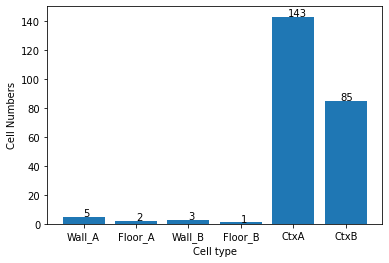

In [324]:
plt.bar(x = [1,2,3,4,5,6],height=[5, 2, 3, 1, 143, 85])
plt.xticks(ticks=[1,2,3,4,5,6],labels=["Wall_A","Floor_A","Wall_B","Floor_B","CtxA","CtxB"])
for s,c in zip([str(i) for i in [5, 2, 3, 1, 143, 85]],[[1,5.2],[2,2.2],[3,3.2],[4,1.2],[5-0.1,143.2],[6-0.1,85.5]]):
    plt.annotate(s,c)
plt.ylabel("Cell Numbers")
plt.xlabel("Cell type")

In [311]:
plt.annotate?